In [2]:
!pip install underthesea
!pip install gensim
!pip install fasttext
!pip install pyvi

  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3142646 sha256=4fc7362e3265991807be1494dc9c2c4cfc5a31b0b508fe336e393081c2de5a6f
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [3]:
import keras
import fasttext
import numpy as np
import pandas as pd
import gensim, re
import string

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.models import Sequential 
from keras.layers import Dense, Embedding 
from keras.layers import LSTM 

from underthesea import word_tokenize
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, GRU, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow import math

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from tqdm import tqdm
import numpy as np
import gensim 
import matplotlib.pyplot as plt
from underthesea import word_tokenize
import pickle
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras

In [7]:
import pandas as pd
names = ["classes", "content"]
dataset = pd.read_excel("/content/drive/MyDrive/NLP_BTL/data/data.xlsx", names=names,header=None)
dataset.columns =['classes', 'content']


In [8]:
print(dataset.shape)

(22290, 2)


In [9]:
dataset.head(100)

,classes,content
0,-2,Sản_phẩm rất đẹp chất_liệu vải quá tuyệt_vời n...
1,-2,Do_dự mãi mới dám mua mà ko ngờ chất_lượng tuy...
2,-2,Sản_phẩm chất_lượng rất tốt có điều chữ trên t...
3,-2,Áo rẻ nhưng chất_lượng khá tốt Không gây thất_...
4,-2,Vì là hàng ord nên lâu lắm luôn Mình đặt từ 27...
...,...,...
95,-2,Giao nhanh hơn dự_kiến mình đặt 1 giữ_nhiệt và...
96,-2,Đặt_hàng tam_giác lại ship quần_đùi hoi thất_v...
97,-2,Giao hàng nhanh áo thì k đuoc như trong ảnh Nê...
98,-2,Chất ổn mọi người nên mua ủng_hộ shop nhé mình...


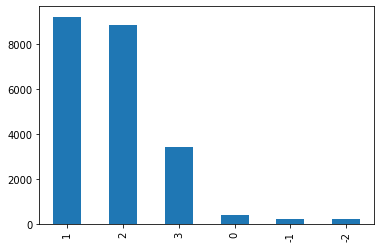

In [10]:
dataset["classes"].value_counts().plot.bar()

In [11]:
data_train = pd.read_excel("/content/drive/MyDrive/NLP_BTL/data/data_train.xlsx")
data_train.columns =['Class', 'Data']
data_test = pd.read_excel("/content/drive/MyDrive/NLP_BTL/data/data_test.xlsx")
data_test.columns =['Class', 'Data']

In [12]:
print(data_train.shape)
print(data_test.shape)

(17831, 2)
(4457, 2)


In [13]:
data_train.head(10)

,Class,Data
0,2,Áo đẹp_shop giao hàng khá nhanh Chất vải có_th...
1,2,Áo xinh mỗi tội mình mặc hơi chật 1 xíu nhưbg ...
2,2,Sản_phẩm chất_lượng tốt Giao hàng nhanh Đóng_g...
3,1,tất đẹp đi thích lắm nói_chung là okla mn nên ...
4,2,đẹp_đẽ chất_lượng tốt đáng đồng_tiền bát gạo n...
5,1,Vớ xinh và rẻ D mỗi tội giao sai màu hoi Mọi n...
6,1,Hình_ảnh mang tính_chất nhận xu Giao hàng nhan...
7,2,Áo ok Nói_chung dùng được với giá tiền Lông đủ...
8,1,Hàng y hình chất_liệu rất đẹp k ngờ_shop bán r...
9,1,Hàng rất ok nha mọi người vải đẹp giao đúng hà...


In [14]:
labels = data_train.iloc[:, 0].values
reviews = data_train.iloc[:, 1].values

In [15]:
encoded_labels = []

for label in labels:
    if label == 3:
        encoded_labels.append([1,0,0,0,0,0])
    elif label == 2:
        encoded_labels.append([0,1,0,0,0,0])
    elif label == 1:
        encoded_labels.append([0,0,1,0,0,0])
    elif label == 0:
        encoded_labels.append([0,0,0,1,0,0])
    elif label == -1:
        encoded_labels.append([0,0,0,0,1,0])
    else:
        encoded_labels.append([0,0,0,0,0,1])

encoded_labels = np.array(encoded_labels)  

In [16]:
from string import digits
reviews_processed = []
unlabeled_processed = [] 

for review in reviews:
    review_cool_one = ''.join([char for char in review if char not in digits])
    reviews_processed.append(review_cool_one)

print(reviews[100])
print(reviews_processed[100])

Vải cũng tốt 71 kg mặc L rộng_rãi Muốn body chắc phải bớt 1 size
Vải cũng tốt  kg mặc L rộng_rãi Muốn body chắc phải bớt  size


In [17]:
#Use PyVi for Vietnamese word tokenizer
from pyvi import ViTokenizer
word_reviews = []
all_words = []
for review in reviews_processed:
    # Tokenize document
    review = ViTokenizer.tokenize(review.lower())
    word_reviews.append(review.split())

print(word_reviews[8])

['hàng', 'y', 'hình', 'chất_liệu', 'rất', 'đẹp', 'k', 'ngờ_shop', 'bán', 'rẻ', 'mà', 'đẹp', 'vậy', 'còn', 'tặng', 'thêm', 'mấy', 'gói', 'xả', 'vải', 'cảm_ơn', 'shop', 'mốt', 'mìng', 'sẽ', 'mua', 'bên', 'shop', 'hoài', 'lun', 'do', 'k', 'co', 'time', 'quay', 'video', 'chupj', 'anh', 'nên', 'đăng', 'đỡ', 'ạ', 'n']


In [18]:
EMBEDDING_DIM = 300 # how big is each word vector
MAX_VOCAB_SIZE = 10000 # how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 300 # max number of words in a comment to use

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [20]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False)
tokenizer.fit_on_texts(word_reviews)
sequences_train = tokenizer.texts_to_sequences(word_reviews)
word_index = tokenizer.word_index

In [21]:
data = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
labels = encoded_labels

In [22]:
print('Shape of X train and X validation tensor:',data.shape)
print('Shape of label train and validation tensor:', labels.shape)

Shape of X train and X validation tensor: (17831, 300)
Shape of label train and validation tensor: (17831, 6)


In [23]:
labels_test = data_test.iloc[:, 0].values
reviews_test = data_test.iloc[:, 1].values

In [24]:

encoded_labels_test = []

for label_test in labels_test:
    if label_test == 3:
        encoded_labels_test.append([1,0,0,0,0,0])
    elif label_test == 2:
        encoded_labels_test.append([0,1,0,0,0,0])
    elif label_test == 1:
        encoded_labels_test.append([0,0,1,0,0,0])
    elif label_test == 0:
        encoded_labels_test.append([0,0,0,1,0,0])
    elif label_test == -1:
        encoded_labels_test.append([0,0,0,0,1,0])
    else:
        encoded_labels_test.append([0,0,0,0,0,1])

encoded_labels_test = np.array(encoded_labels_test)  

In [25]:
reviews_processed_test = []
unlabeled_processed_test = [] 
for review_test in reviews_test:
    review_cool_one = ''.join([char for char in review_test if char not in digits])
    reviews_processed_test.append(review_cool_one)

In [26]:
word_reviews_test = []
all_words = []
for review_test in reviews_processed_test:
    review_test = ViTokenizer.tokenize(review_test.lower())
    word_reviews_test.append(review_test.split())

In [27]:
sequences_test = tokenizer.texts_to_sequences(word_reviews_test)
data_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
labels_test = encoded_labels_test

In [28]:
print('Shape of X train and X validation tensor:',data_test.shape)
print('Shape of label train and validation tensor:', labels_test.shape)

Shape of X train and X validation tensor: (4457, 300)
Shape of label train and validation tensor: (4457, 6)


In [29]:
%cp -rf '/content/drive/MyDrive/NLP_BTL/cc.vi.300.bin.zip' '/content/'


In [30]:
!unzip '/content/cc.vi.300.bin.zip'
from IPython.display import clear_output
clear_output()

In [31]:
fasttext_model_path='/content/cc.vi.300.bin'
embeddings_index = fasttext.load_model(fasttext_model_path)

In [32]:
word2id = dict()
max_words = 0 # maximum number of words in a sentence

# Construction of word2id dict
for sentence in word_reviews[8]:
    for word in sentence:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(sentence) > max_words:
        max_words = len(sentence)
    
# Construction of label2id and id2label dicts

id2word = {v: k for k, v in word2id.items()}

In [33]:
# embedding matrix
print('preparing embedding matrix...')

MAX_NB_WORDS = 100000
words_not_found = []
embedding_dim = 300 # The dimension of word embeddings
nb_words = min(MAX_NB_WORDS, len(word2id))

# Với mỗi từ trong câu, lưu lại word vector phụ vụ để huấn luyện mô hình
embedding_matrix = np.zeros((nb_words, embedding_dim))
for word, i in word2id.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index[word]
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 1


In [34]:
print(len(words_not_found))

0


In [35]:
vocabulary_size=min(len(word_index) + 1, MAX_VOCAB_SIZE)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
print("Vocab size with <UNK>:", vocabulary_size)

for word, i in word_index.items():
    if i>=MAX_VOCAB_SIZE:
        continue
    try:
        embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(embeddings_index)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

Vocab size with <UNK>: 10000


# CNN

In [36]:
from keras.models import Model
from keras.layers import *
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
sequence_length = MAX_SEQUENCE_LENGTH
filter_sizes = [5,6,7]
num_filters = 100
drop = 0.1

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)

reshape = Reshape((sequence_length,EMBEDDING_DIM))(embedding)

conv_1 = Conv1D(num_filters, (filter_sizes[0], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv1D(num_filters, (filter_sizes[1], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_3 = Conv1D(num_filters, (filter_sizes[2], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)


conv_1 = GlobalMaxPooling1D()(conv_1)
conv_2 = GlobalMaxPooling1D()(conv_2)
conv_3 = GlobalMaxPooling1D()(conv_3)

concat = Concatenate()([conv_1, conv_2,conv_3])

dropout = Dropout(drop)(concat)
output = Dense(units=6, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)

# this creates a model that includes
model_CNN = Model(inputs, output)

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_CNN.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_CNN.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     3000000     ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 300, 300)     0           ['embedding[0][0]']              
                                                                                                  
 conv1d (Conv1D)                (None, 300, 100)     150100      ['reshape[0][0]']                
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
#define callbacks
early_stopping = EarlyStopping(monitor='loss', min_delta=0.1, patience=4, verbose=1)
callbacks_list = [early_stopping]

In [ ]:
history_CNN = model_CNN.fit(data, labels, #validation_split=0.2,
          epochs=100, batch_size=256, callbacks=callbacks_list, shuffle=True)

Epoch 1/100
70/70 [==============================] - 393s 6s/step - loss: 2.2716 - accuracy: 0.7229
Epoch 2/100
70/70 [==============================] - 393s 6s/step - loss: 0.5589 - accuracy: 0.9328
Epoch 3/100
70/70 [==============================] - 398s 6s/step - loss: 0.4104 - accuracy: 0.9471
Epoch 4/100
70/70 [==============================] - 396s 6s/step - loss: 0.3336 - accuracy: 0.9576
Epoch 5/100
70/70 [==============================] - 392s 6s/step - loss: 0.2793 - accuracy: 0.9680
Epoch 6/100
66/70 [===========================>..] - ETA: 22s - loss: 0.2546 - accuracy: 0.9714

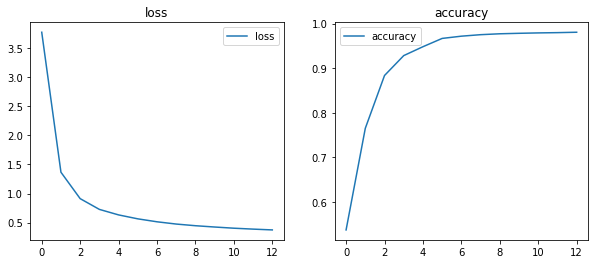

In [ ]:
def plot_loss_accuracy(history):
    fig, axs = plt.subplots(1,2, figsize=(10, 4))
    hist = history.history
    for ax, metric in zip(axs, ["loss","accuracy"]):
        ax.plot(hist[metric])
        ax.legend([metric])
        ax.set_title(metric)
    plt.style.use('default')

plot_loss_accuracy(history_CNN)

In [ ]:
score = model_CNN.evaluate(data_test, labels_test)

print("%s: %.2f" % (model_CNN.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model_CNN.metrics_names[1], score[1]*100))

89/89 [==============================] - 1s 8ms/step - loss: 0.4361 - accuracy: 0.9665
loss: 0.44
accuracy: 96.65%


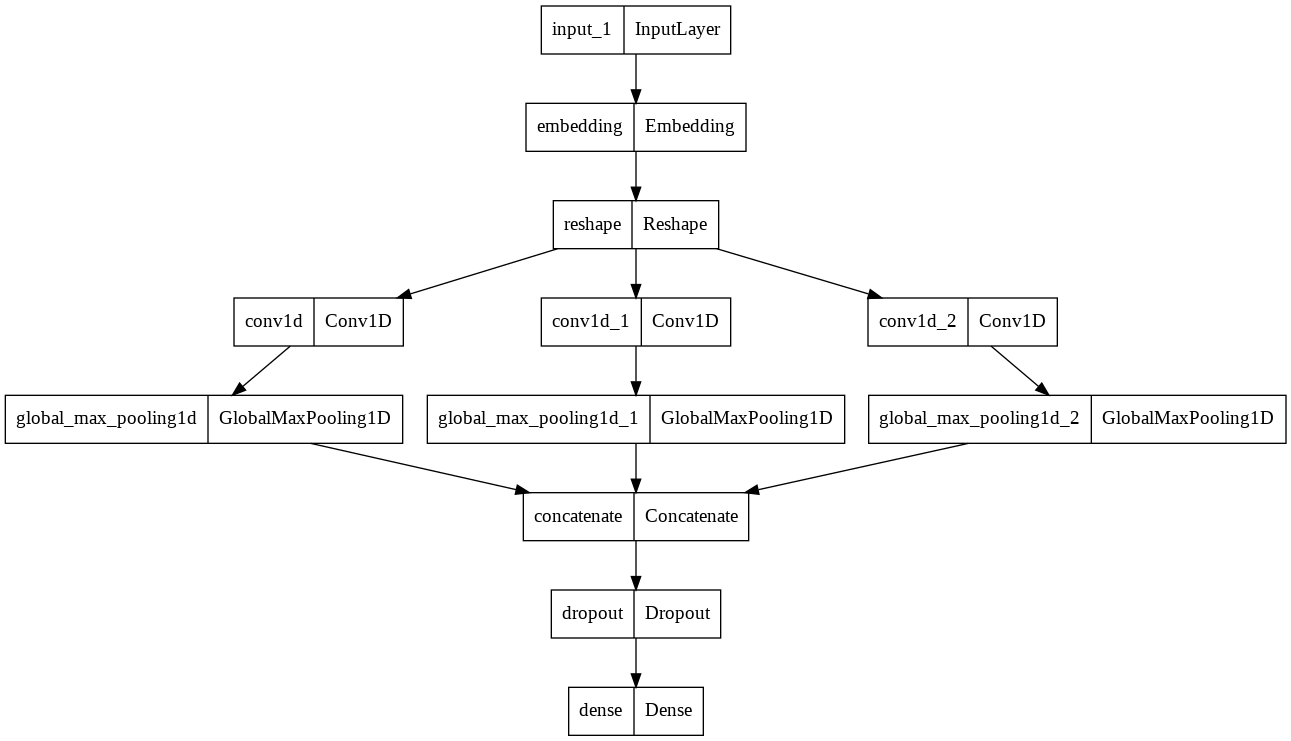

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_CNN)

# CNN filter

In [ ]:
sequence_length = MAX_SEQUENCE_LENGTH
filter_sizes = [4,5,6,7,8]
num_filters = 100
drop = 0.1

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)

reshape = Reshape((sequence_length,EMBEDDING_DIM))(embedding)

conv_1 = Conv1D(num_filters, (filter_sizes[0], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv1D(num_filters, (filter_sizes[1], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_3 = Conv1D(num_filters, (filter_sizes[2], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_4 = Conv1D(num_filters, (filter_sizes[3], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_5 = Conv1D(num_filters, (filter_sizes[4], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)


conv_1 = GlobalMaxPooling1D()(conv_1)
conv_2 = GlobalMaxPooling1D()(conv_2)
conv_3 = GlobalMaxPooling1D()(conv_3)
conv_4 = GlobalMaxPooling1D()(conv_4)
conv_5 = GlobalMaxPooling1D()(conv_5)

concat = Concatenate()([conv_1, conv_2,conv_3,conv_4,conv_5])

dropout = Dropout(drop)(concat)
output = Dense(units=15, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)

# this creates a model that includes
model_CNN_2 = Model(inputs, output)

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_CNN_2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_CNN_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     3000000     ['input_2[0][0]']                
                                                                                                  
 reshape_1 (Reshape)            (None, 300, 300)     0           ['embedding[1][0]']              
                                                                                                  
 conv1d_3 (Conv1D)              (None, 300, 100)     120100      ['reshape_1[0][0]']              
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#define callbacks
early_stopping = EarlyStopping(monitor='loss', min_delta=0.1, patience=4, verbose=1)
callbacks_list = [early_stopping]

history_CNN_2 = model_CNN_2.fit(data, labels, #validation_split=0.2,
          epochs=100, batch_size=256, callbacks=callbacks_list, shuffle=True)

Epoch 1/100
45/45 [==============================] - 10s 181ms/step - loss: 4.4017 - accuracy: 0.8908
Epoch 2/100
45/45 [==============================] - 8s 180ms/step - loss: 0.7595 - accuracy: 0.9772
Epoch 3/100
45/45 [==============================] - 8s 183ms/step - loss: 0.4594 - accuracy: 0.9797
Epoch 4/100
45/45 [==============================] - 8s 184ms/step - loss: 0.3978 - accuracy: 0.9811
Epoch 5/100
45/45 [==============================] - 8s 183ms/step - loss: 0.3639 - accuracy: 0.9818
Epoch 6/100
45/45 [==============================] - 8s 180ms/step - loss: 0.3398 - accuracy: 0.9818
Epoch 7/100
45/45 [==============================] - 8s 178ms/step - loss: 0.3215 - accuracy: 0.9833
Epoch 8/100
45/45 [==============================] - 8s 177ms/step - loss: 0.3089 - accuracy: 0.9835
Epoch 9/100
45/45 [==============================] - 8s 177ms/step - loss: 0.2981 - accuracy: 0.9838
Epoch 10/100
45/45 [==============================] - 8s 177ms/step - loss: 0.2889 - accur

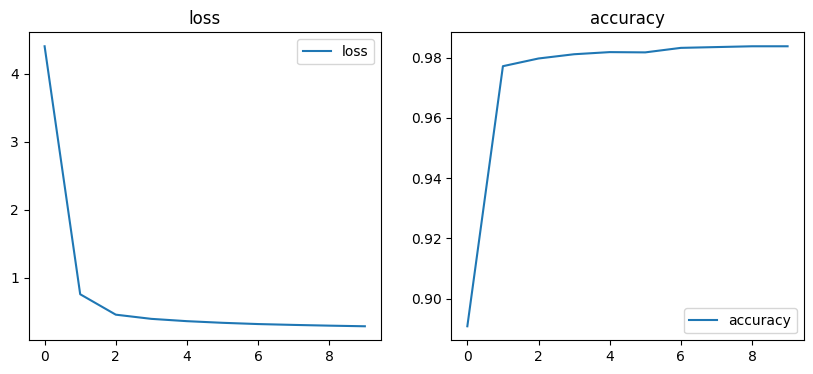

In [ ]:
def plot_loss_accuracy(history):
    fig, axs = plt.subplots(1,2, figsize=(10, 4))
    hist = history.history
    for ax, metric in zip(axs, ["loss","accuracy"]):
        ax.plot(hist[metric])
        ax.legend([metric])
        ax.set_title(metric)
    plt.style.use('default')

plot_loss_accuracy(history_CNN_2)

In [ ]:
score = model_CNN_2.evaluate(data_test, labels_test)

print("%s: %.2f" % (model_CNN_2.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model_CNN_2.metrics_names[1], score[1]*100))


89/89 [==============================] - 1s 10ms/step - loss: 0.3677 - accuracy: 0.9672
loss: 0.37
accuracy: 96.72%


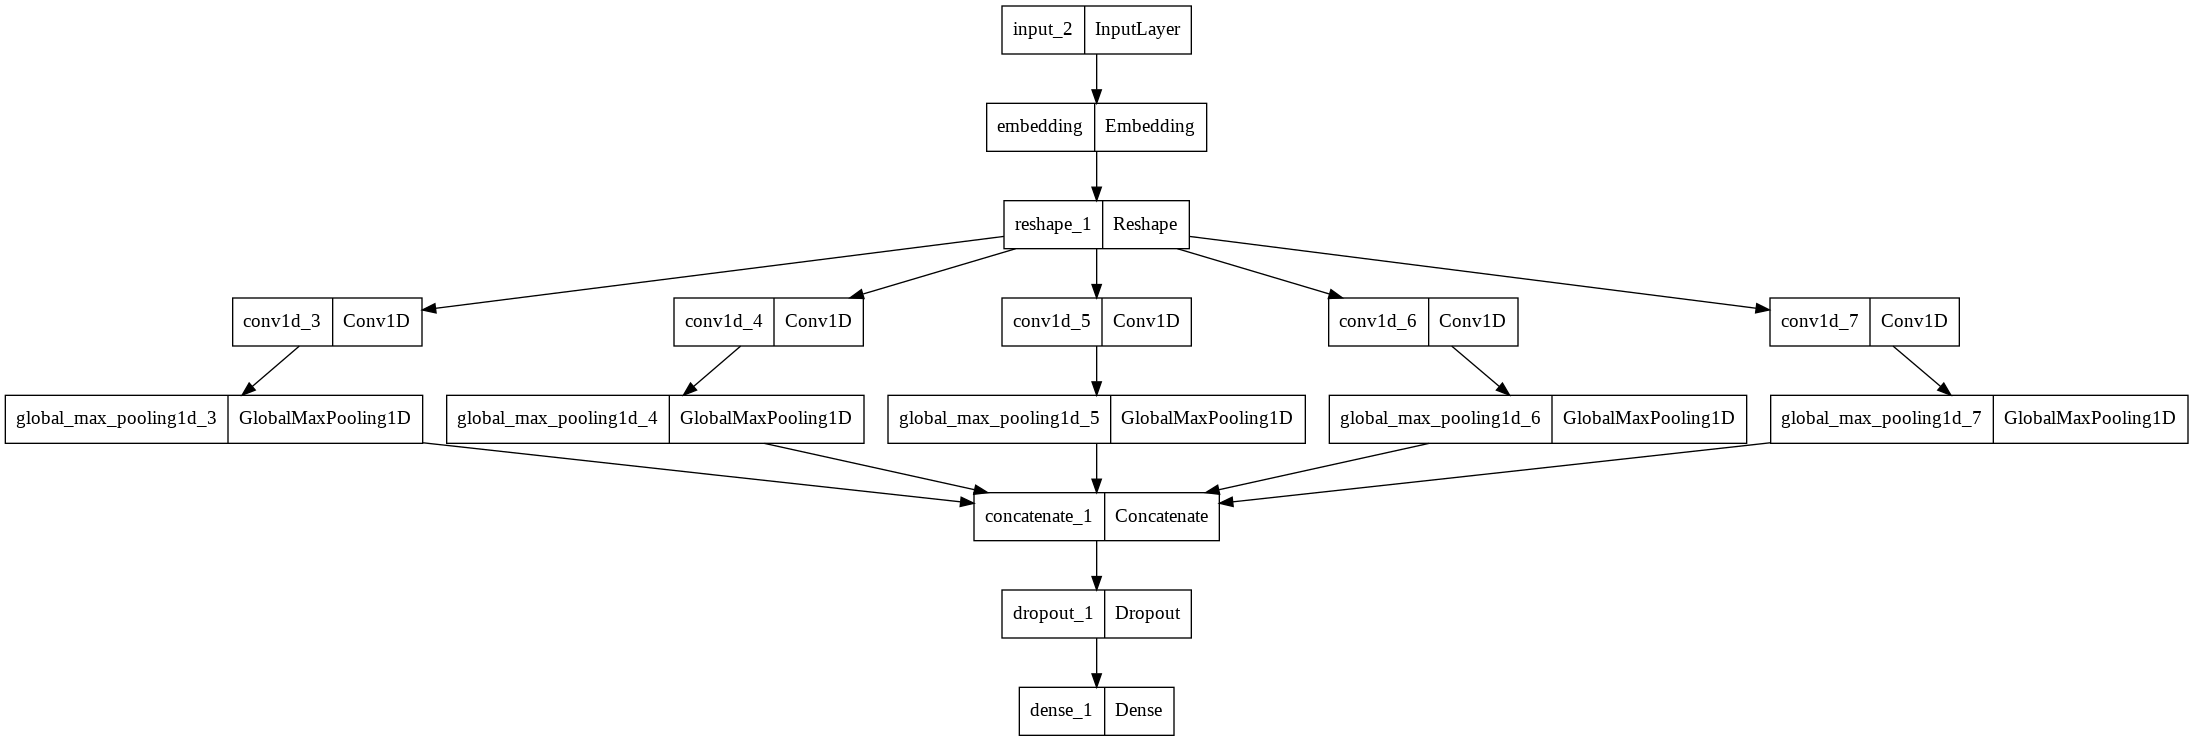

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_CNN_2)

# Bidirectional LSTM

In [ ]:
from keras.layers import Bidirectional, LSTM
sequence_length = MAX_SEQUENCE_LENGTH
filter_sizes = [3,4,5]
num_filters = 100
drop = 0.1
hidden_dims = 100

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
lstm_layer = Bidirectional(LSTM(128,dropout=drop, return_sequences=False))(embedding)

dense_layer = Dense(hidden_dims*2, activation='sigmoid')(lstm_layer)
dropout= Dropout(0.2)(dense_layer)
output = Dense(units=15, activation='softmax',kernel_regularizer=regularizers.l2(0.05))(dropout)

# this creates a model that includes
model_LSTM = Model(inputs, output)

adam = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)
model_LSTM.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model_LSTM.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 300)          3000000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              439296    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 200)               51400     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 15)                3015      
                                                           

In [ ]:
history_LSTM = model_LSTM.fit(data, labels, epochs=100, batch_size=256, callbacks=callbacks_list, verbose=1, shuffle=True)

Epoch 1/100
45/45 [==============================] - 10s 114ms/step - loss: 0.4675 - accuracy: 0.2180
Epoch 2/100
45/45 [==============================] - 5s 114ms/step - loss: 0.2447 - accuracy: 0.2196
Epoch 3/100
45/45 [==============================] - 5s 118ms/step - loss: 0.2400 - accuracy: 0.2273
Epoch 4/100
45/45 [==============================] - 5s 120ms/step - loss: 0.2371 - accuracy: 0.2257
Epoch 5/100
45/45 [==============================] - 5s 119ms/step - loss: 0.2348 - accuracy: 0.2201
Epoch 6/100
45/45 [==============================] - 5s 118ms/step - loss: 0.2330 - accuracy: 0.2198
Epoch 6: early stopping


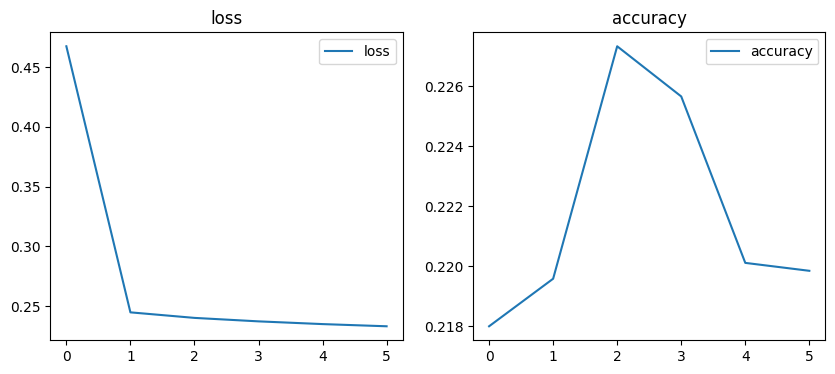

In [ ]:
def plot_loss_accuracy(history):
    fig, axs = plt.subplots(1,2, figsize=(10, 4))
    hist = history.history
    for ax, metric in zip(axs, ["loss","accuracy"]):
        ax.plot(hist[metric])
        ax.legend([metric])
        ax.set_title(metric)
    plt.style.use('default')

plot_loss_accuracy(history_LSTM)

In [ ]:
score = model_LSTM.evaluate(data_test, labels_test)
print("%s: %.2f" % (model_LSTM.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model_LSTM.metrics_names[1], score[1]*100))

89/89 [==============================] - 2s 16ms/step - loss: 0.2310 - accuracy: 0.2210
loss: 0.23
accuracy: 22.10%


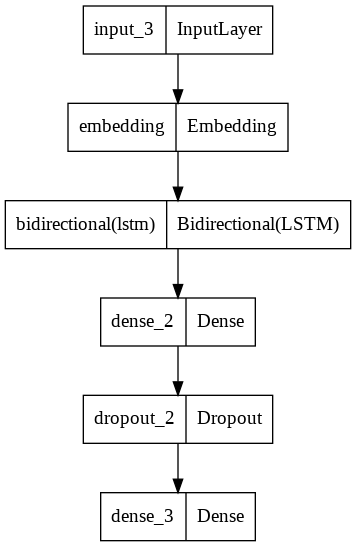

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_LSTM)

# CNN more filters + LSTM (Serial)

In [ ]:
sequence_length = MAX_SEQUENCE_LENGTH
filter_sizes = [4,5,6,7]
num_filters = 100
drop = 0.1

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)

reshape = Reshape((sequence_length,EMBEDDING_DIM))(embedding)

conv_1 = Conv1D(num_filters, (filter_sizes[0], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv1D(num_filters, (filter_sizes[1], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_3 = Conv1D(num_filters, (filter_sizes[2], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_4 = Conv1D(num_filters, (filter_sizes[3], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)


concat = Concatenate(axis=-1)([conv_1, conv_2, conv_3, conv_4])
concat = Dropout(drop)(concat)
lstm = LSTM(512, dropout=drop, recurrent_dropout=drop)(concat)
lstm = Dropout(drop)(lstm)
output = Dense(units=15, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(lstm)


# this creates a model that includes
model_CNN_LSTM = Model(inputs, output)

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_CNN_LSTM.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_CNN_LSTM.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     3000000     ['input_5[0][0]']                
                                                                                                  
 reshape_3 (Reshape)            (None, 300, 300)     0           ['embedding[4][0]']              
                                                                                                  
 conv1d_8 (Conv1D)              (None, 300, 100)     120100      ['reshape_3[0][0]']              
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#define callbacks
early_stopping = EarlyStopping(monitor='loss', min_delta=0.1, patience=4, verbose=1)
callbacks_list = [early_stopping]

history_CNN_LSTM = model_CNN_LSTM.fit(data, labels, epochs=100, batch_size=256, callbacks=callbacks_list, shuffle=True)

Epoch 1/100
45/45 [==============================] - 76s 2s/step - loss: 3.9878 - accuracy: 0.6752
Epoch 2/100
45/45 [==============================] - 74s 2s/step - loss: 1.0946 - accuracy: 0.9290
Epoch 3/100
45/45 [==============================] - 72s 2s/step - loss: 0.7177 - accuracy: 0.9406
Epoch 4/100
45/45 [==============================] - 72s 2s/step - loss: 0.4587 - accuracy: 0.9804
Epoch 5/100
45/45 [==============================] - 72s 2s/step - loss: 0.3870 - accuracy: 0.9774
Epoch 6/100
45/45 [==============================] - 72s 2s/step - loss: 0.3434 - accuracy: 0.9856
Epoch 7/100
45/45 [==============================] - 70s 2s/step - loss: 0.2741 - accuracy: 0.9816
Epoch 8/100
45/45 [==============================] - 69s 2s/step - loss: 0.2750 - accuracy: 0.9856
Epoch 9/100
45/45 [==============================] - 72s 2s/step - loss: 0.2265 - accuracy: 0.9865
Epoch 10/100
45/45 [==============================] - 72s 2s/step - loss: 0.3150 - accuracy: 0.9825
Epoch 11/

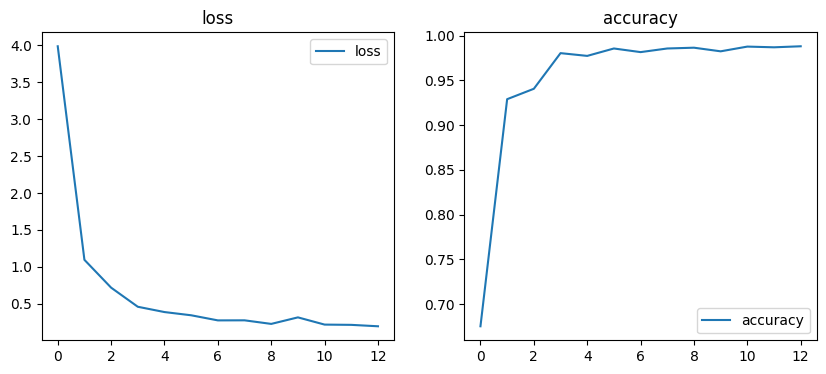

In [ ]:
def plot_loss_accuracy(history):
    fig, axs = plt.subplots(1,2, figsize=(10, 4))
    hist = history.history
    for ax, metric in zip(axs, ["loss","accuracy"]):
        ax.plot(hist[metric])
        ax.legend([metric])
        ax.set_title(metric)
    plt.style.use('default')

plot_loss_accuracy(history_CNN_LSTM)

In [ ]:
score = model_CNN_LSTM.evaluate(data_test, labels_test)

print("%s: %.2f" % (model_CNN_LSTM.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model_CNN_LSTM.metrics_names[1], score[1]*100))

89/89 [==============================] - 10s 113ms/step - loss: 0.3300 - accuracy: 0.9605
loss: 0.33
accuracy: 96.05%


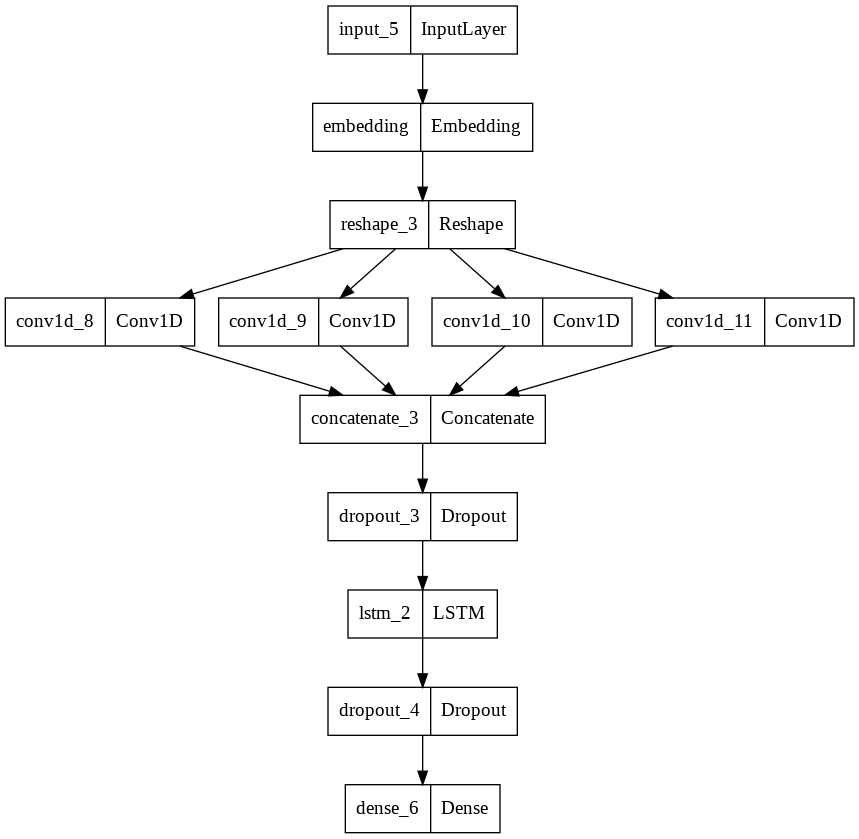

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_CNN_LSTM)

#CNN more filters + LSTM (Paralellism)


In [ ]:
sequence_length = MAX_SEQUENCE_LENGTH
filter_sizes = [4,5,6,7]
num_filters = 100
drop = 0.1

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)

reshape = Reshape((sequence_length,EMBEDDING_DIM))(embedding)

conv_1 = Conv1D(num_filters, (filter_sizes[0], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv1D(num_filters, (filter_sizes[1], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_3 = Conv1D(num_filters, (filter_sizes[2], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_4 = Conv1D(num_filters, (filter_sizes[3], ),padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)


conv_1 = GlobalMaxPooling1D()(conv_1)
conv_2 = GlobalMaxPooling1D()(conv_2)
conv_3 = GlobalMaxPooling1D()(conv_3)
conv_4 = GlobalMaxPooling1D()(conv_4)

concat = Concatenate()([conv_1, conv_2, conv_3, conv_4])

dropout = Dropout(drop)(concat)

lstm = LSTM(500, dropout=drop, recurrent_dropout=drop, return_sequences=False)(embedding)

concat = Concatenate(axis=-1)([dropout, lstm])
output = Dense(units=15, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(concat)

# this creates a model that includes
model_CNN_2_LSTM = Model(inputs, output)

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_CNN_2_LSTM.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_CNN_2_LSTM.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     3000000     ['input_6[0][0]']                
                                                                                                  
 reshape_4 (Reshape)            (None, 300, 300)     0           ['embedding[5][0]']              
                                                                                                  
 conv1d_12 (Conv1D)             (None, 300, 100)     120100      ['reshape_4[0][0]']              
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
early_stopping = EarlyStopping(monitor='loss', min_delta=0.1, patience=4, verbose=1)
callbacks_list = [early_stopping]

history_CNN_2_LSTM = model_CNN_2_LSTM.fit(data, labels, epochs=100, batch_size=256, callbacks=callbacks_list, shuffle=True)

Epoch 1/100
45/45 [==============================] - 73s 2s/step - loss: 3.5607 - accuracy: 0.9258
Epoch 2/100
45/45 [==============================] - 69s 2s/step - loss: 0.5357 - accuracy: 0.9838
Epoch 3/100
45/45 [==============================] - 68s 2s/step - loss: 0.2502 - accuracy: 0.9837
Epoch 4/100
45/45 [==============================] - 67s 1s/step - loss: 0.1919 - accuracy: 0.9864
Epoch 5/100
45/45 [==============================] - 67s 1s/step - loss: 0.1453 - accuracy: 0.9896
Epoch 6/100
45/45 [==============================] - 67s 1s/step - loss: 0.1173 - accuracy: 0.9909
Epoch 7/100
45/45 [==============================] - 67s 1s/step - loss: 0.1197 - accuracy: 0.9894
Epoch 8/100
45/45 [==============================] - 67s 1s/step - loss: 0.1135 - accuracy: 0.9897
Epoch 9/100
45/45 [==============================] - 66s 1s/step - loss: 0.0890 - accuracy: 0.9923
Epoch 9: early stopping


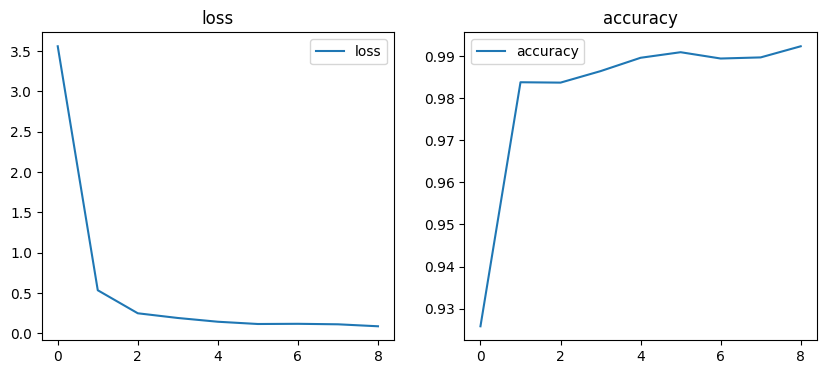

In [ ]:
def plot_loss_accuracy(history):
    fig, axs = plt.subplots(1,2, figsize=(10, 4))
    hist = history.history
    for ax, metric in zip(axs, ["loss","accuracy"]):
        ax.plot(hist[metric])
        ax.legend([metric])
        ax.set_title(metric)
    plt.style.use('default')

plot_loss_accuracy(history_CNN_2_LSTM)

In [ ]:
score = model_CNN_2_LSTM.evaluate(data_test, labels_test)

print("%s: %.2f" % (model_CNN_2_LSTM.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model_CNN_2_LSTM.metrics_names[1], score[1]*100))

89/89 [==============================] - 11s 114ms/step - loss: 0.2314 - accuracy: 0.9651
loss: 0.23
accuracy: 96.51%


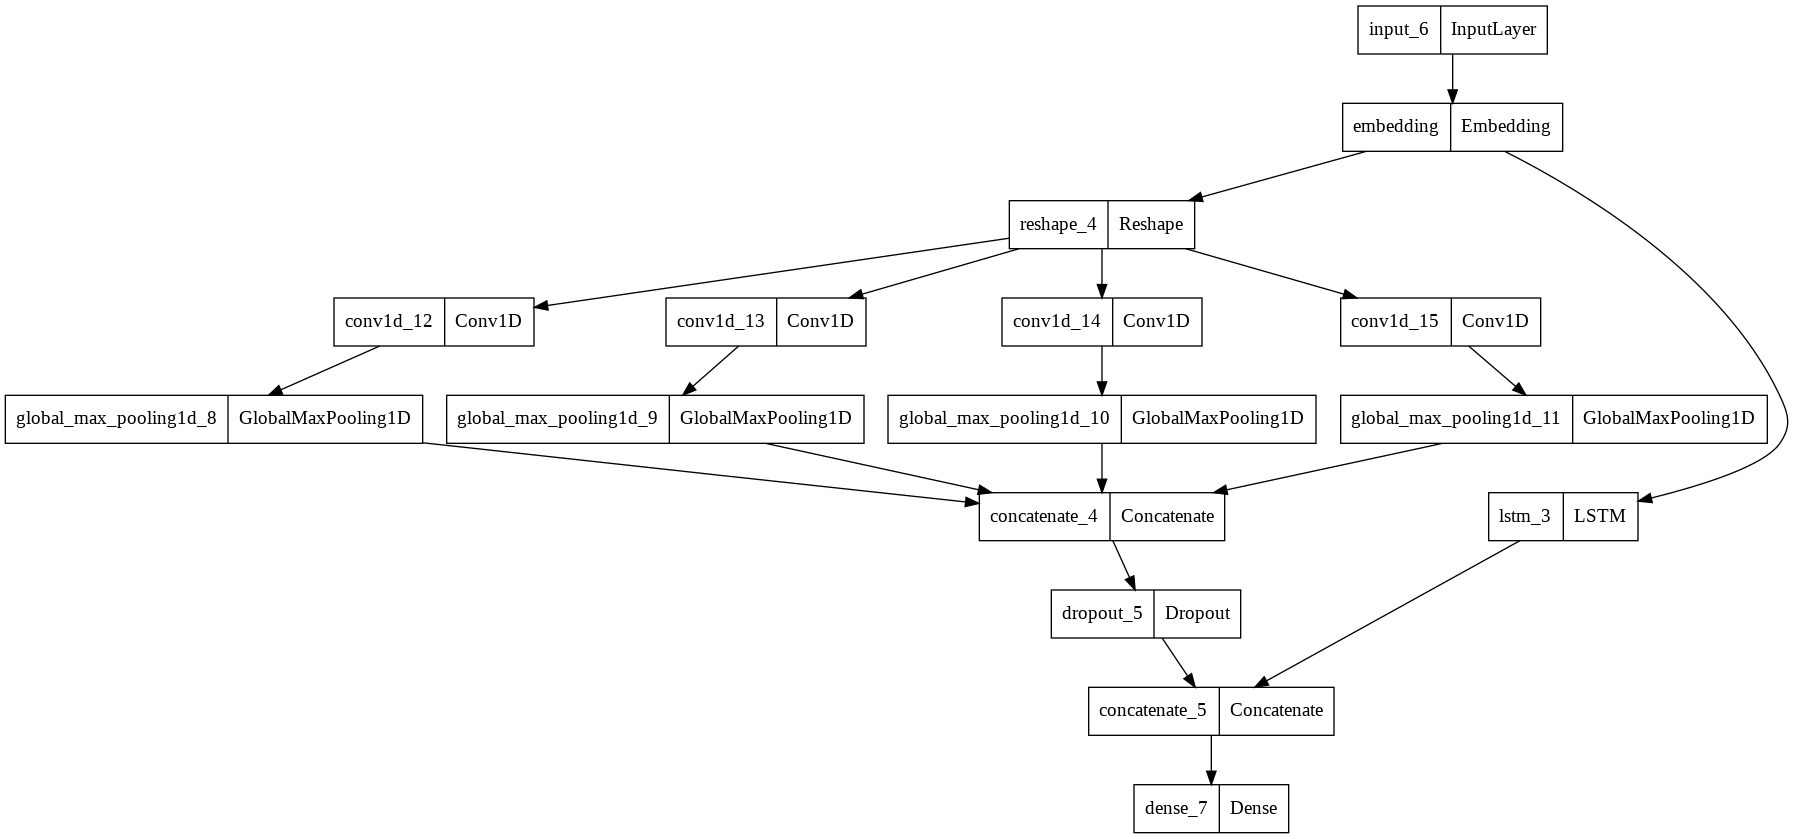

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_CNN_2_LSTM)

# Attention

In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
 
    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
 
        return context_vector, attention_weights

In [ ]:
EMBED_SIZE = 300

nb_words = len(word2id)
MAX_FEATURES = 6000
sequence_input = Input(shape=(sequence_length,), dtype="int32")
embedded_sequences = Embedding(MAX_FEATURES, EMBED_SIZE)(sequence_input)

lstm = Bidirectional(LSTM(128, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(128, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

In [ ]:
from keras.layers import LSTM,Activation,Concatenate,Dropout
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

context_vector, attention_weights = Attention(10)(lstm, state_h)

# Removal of the globalMaxPool1D could be trouble
#globmax = GlobalMaxPool1D()(context_vector)
dense1 = Dense(15, activation="relu")(context_vector)
dropout = Dropout(0.05)(dense1)
output = Dense(15, activation="sigmoid")(dropout)

model_AT_LSTM = keras.Model(inputs=sequence_input, outputs=output)

In [ ]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_AT_LSTM.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_AT_LSTM.summary()

Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_38 (InputLayer)          [(None, 300)]        0           []                               
                                                                                                  
 embedding_27 (Embedding)       (None, 300, 300)     1800000     ['input_38[0][0]']               
                                                                                                  
 bi_lstm_0 (Bidirectional)      (None, 300, 256)     439296      ['embedding_27[0][0]']           
                                                                                                  
 bi_lstm_1 (Bidirectional)      [(None, 300, 256),   394240      ['bi_lstm_0[0][0]']              
                                 (None, 128),                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
early_stopping = EarlyStopping(monitor='loss', min_delta=0.1, patience=4, verbose=1)
callbacks_list = [early_stopping]

history_AT_LSTM = model_AT_LSTM.fit(data, labels, #validation_split=0.2,
          epochs=100, batch_size=256, callbacks=callbacks_list, shuffle=True)

Epoch 1/100
45/45 [==============================] - 15s 203ms/step - loss: 2.3791 - accuracy: 0.1396
Epoch 2/100
45/45 [==============================] - 9s 208ms/step - loss: 1.8843 - accuracy: 0.2857
Epoch 3/100
45/45 [==============================] - 9s 205ms/step - loss: 1.1375 - accuracy: 0.5766
Epoch 4/100
45/45 [==============================] - 9s 201ms/step - loss: 0.7113 - accuracy: 0.7518
Epoch 5/100
45/45 [==============================] - 9s 199ms/step - loss: 0.4300 - accuracy: 0.8755
Epoch 6/100
45/45 [==============================] - 9s 197ms/step - loss: 0.3218 - accuracy: 0.9063
Epoch 7/100
45/45 [==============================] - 9s 197ms/step - loss: 0.2466 - accuracy: 0.9299
Epoch 8/100
45/45 [==============================] - 9s 197ms/step - loss: 0.1781 - accuracy: 0.9544
Epoch 9/100
45/45 [==============================] - 9s 198ms/step - loss: 0.1412 - accuracy: 0.9648
Epoch 10/100
45/45 [==============================] - 9s 201ms/step - loss: 0.1116 - accur

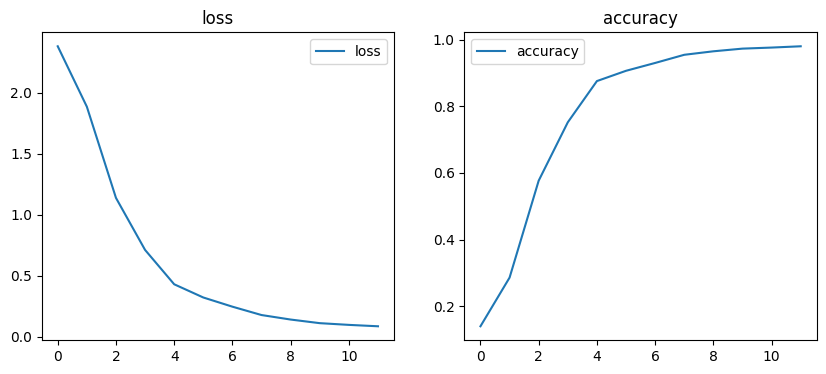

In [ ]:
def plot_loss_accuracy(history):
    fig, axs = plt.subplots(1,2, figsize=(10, 4))
    hist = history.history
    for ax, metric in zip(axs, ["loss","accuracy"]):
        ax.plot(hist[metric])
        ax.legend([metric])
        ax.set_title(metric)
    plt.style.use('default')

plot_loss_accuracy(history_AT_LSTM)

In [ ]:
score = model_AT_LSTM.evaluate(data_test, labels_test)
print("%s: %.2f" % (model_AT_LSTM.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model_AT_LSTM.metrics_names[1], score[1]*100))

89/89 [==============================] - 4s 29ms/step - loss: 0.3468 - accuracy: 0.9330
loss: 0.35
accuracy: 93.30%


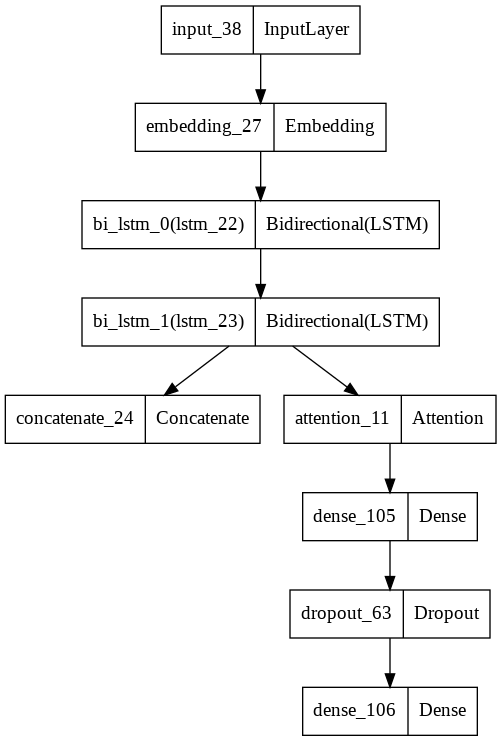

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_AT_LSTM)

# Bi-LSTM + Attention

In [ ]:
sequence_length = data.shape[1]
drop = 0.1

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)

bilstm = Bidirectional(LSTM(128, return_sequences=True))(embedding)

bilstm = Reshape((MAX_SEQUENCE_LENGTH, -1, 2))(bilstm)
permute_bilstm = Permute((3,1,2))(bilstm)

selfattn = Attention()([permute_bilstm[:,0], permute_bilstm[:,1]])

input_layer = Concatenate()([permute_bilstm[:,0], selfattn])

input_layer = Dense(256, activation="tanh")(input_layer)


flatten = Flatten()(input_layer)

output = Dense(units=15, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(flatten)

model_LSTM_AT = Model(inputs, output)

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_LSTM_AT.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_LSTM_AT.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     3000000     ['input_21[0][0]']               
                                                                                                  
 bidirectional_5 (Bidirectional  (None, 300, 256)    439296      ['embedding[13][0]']             
 )                                                                                                
                                                                                                  
 reshape_8 (Reshape)            (None, 300, 128, 2)  0           ['bidirectional_5[0][0]'] 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_LSTM_AT = model_LSTM_AT.fit(data, labels, epochs=100, batch_size=256, callbacks=callbacks_list, shuffle=True, verbose=1)

Epoch 1/100
45/45 [==============================] - 10s 146ms/step - loss: 1.4557 - accuracy: 0.6800
Epoch 2/100
45/45 [==============================] - 7s 152ms/step - loss: 0.2600 - accuracy: 0.9809
Epoch 3/100
45/45 [==============================] - 7s 153ms/step - loss: 0.1109 - accuracy: 0.9922
Epoch 4/100
45/45 [==============================] - 7s 155ms/step - loss: 0.1298 - accuracy: 0.9836
Epoch 5/100
45/45 [==============================] - 7s 155ms/step - loss: 0.2122 - accuracy: 0.9900
Epoch 6/100
45/45 [==============================] - 7s 155ms/step - loss: 0.1156 - accuracy: 0.9932
Epoch 7/100
45/45 [==============================] - 7s 153ms/step - loss: 0.0728 - accuracy: 0.9948
Epoch 7: early stopping


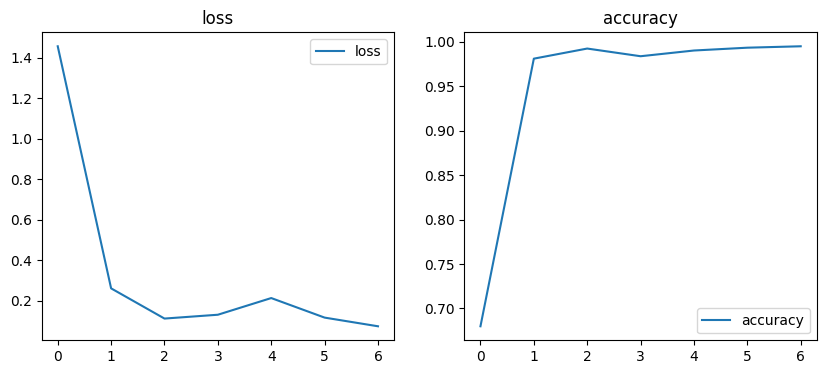

In [ ]:
def plot_loss_accuracy(history):
    fig, axs = plt.subplots(1,2, figsize=(10, 4))
    hist = history.history
    for ax, metric in zip(axs, ["loss","accuracy"]):
        ax.plot(hist[metric])
        ax.legend([metric])
        ax.set_title(metric)
    plt.style.use('default')

plot_loss_accuracy(history_LSTM_AT)

In [ ]:
score = model_LSTM_AT.evaluate(data_test, labels_test)
print("%s: %.2f%%" % (model_LSTM_AT.metrics_names[0], score[0]*100))
print("%s: %.2f%%" % (model_LSTM_AT.metrics_names[1], score[1]*100))

89/89 [==============================] - 3s 26ms/step - loss: 0.3289 - accuracy: 0.9556
loss: 32.89%
accuracy: 95.56%


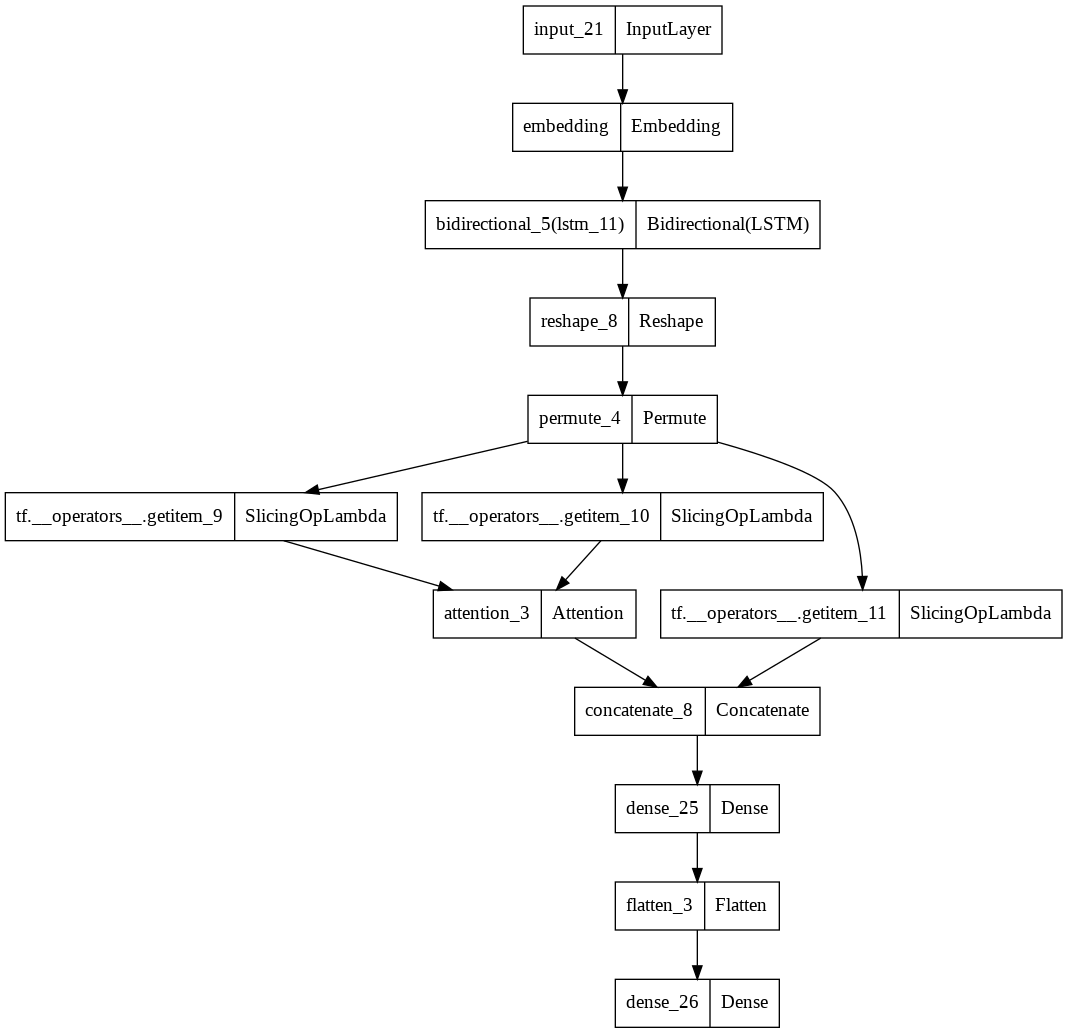

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_LSTM_AT)

# Transformer

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(sequence_length,))
embedding_layer = TokenAndPositionEmbedding(sequence_length, vocabulary_size, EMBEDDING_DIM)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(EMBEDDING_DIM, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(15, activation="softmax")(x)

model_trans = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_trans.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [ ]:
history_trans = model_trans.fit(data, labels, #validation_split=0.2,
          epochs=100, batch_size=256, callbacks=callbacks_list, shuffle=True)

Epoch 1/100
45/45 [==============================] - 16s 325ms/step - loss: 2.2936 - accuracy: 0.2096
Epoch 2/100
45/45 [==============================] - 15s 329ms/step - loss: 2.0992 - accuracy: 0.2111
Epoch 3/100
45/45 [==============================] - 14s 314ms/step - loss: 1.9559 - accuracy: 0.2853
Epoch 4/100
45/45 [==============================] - 14s 308ms/step - loss: 1.4241 - accuracy: 0.4538
Epoch 5/100
45/45 [==============================] - 14s 304ms/step - loss: 1.0200 - accuracy: 0.6408
Epoch 6/100
45/45 [==============================] - 14s 306ms/step - loss: 0.8832 - accuracy: 0.7161
Epoch 7/100
45/45 [==============================] - 14s 311ms/step - loss: 0.8242 - accuracy: 0.7291
Epoch 8/100
45/45 [==============================] - 14s 316ms/step - loss: 0.7510 - accuracy: 0.7695
Epoch 9/100
45/45 [==============================] - 14s 317ms/step - loss: 0.6332 - accuracy: 0.7812
Epoch 10/100
45/45 [==============================] - 14s 314ms/step - loss: 0.534

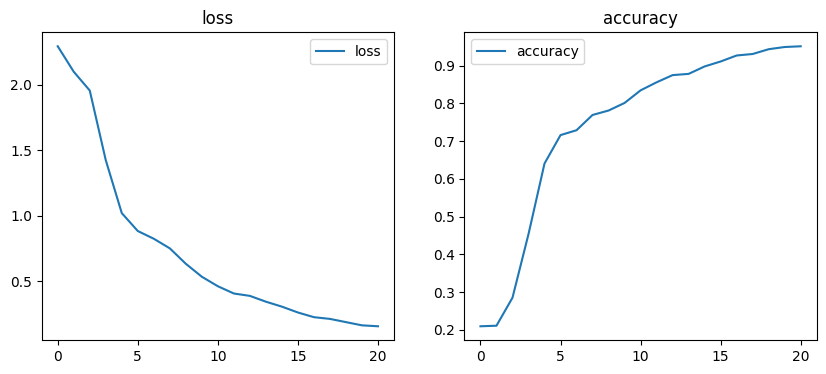

In [ ]:
def plot_loss_accuracy(history):
    fig, axs = plt.subplots(1,2, figsize=(10, 4))
    hist = history.history
    for ax, metric in zip(axs, ["loss","accuracy"]):
        ax.plot(hist[metric])
        ax.legend([metric])
        ax.set_title(metric)
    plt.style.use('default')

plot_loss_accuracy(history_trans)

In [ ]:
score = model_trans.evaluate(data_test, labels_test)
print("%s: %.2f" % (model_trans.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model_trans.metrics_names[1], score[1]*100))

89/89 [==============================] - 2s 16ms/step - loss: 0.4420 - accuracy: 0.9464
loss: 0.44
accuracy: 94.64%


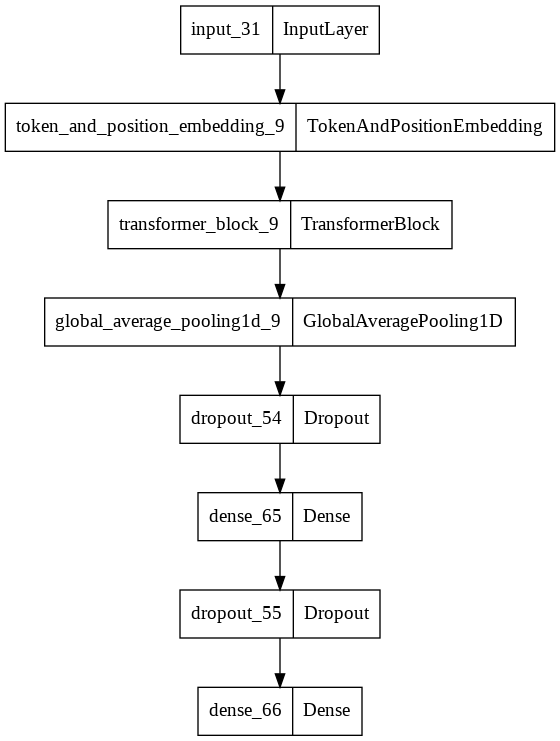

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_trans)

# Predict

**Model CNN with more filter (because this model has the best accuracy)**

In [ ]:
prediction = model_trans.predict(data_test)

labels_text = ['Đẹp', 'Tuyệt', 'ok','tốt','ổn','ưng','chất lượng','xinh','rẻ','giao hàng nhanh','xấu','tệ','chậm','thất vọng','đắt']

In [ ]:
print(reviews_test[10])
labels_text[np.argmax(labels_test[10])]

Tạm OK nha tiền nào của đấy mà nên thử nhaaaaaaa mọi người hihuuuuuu


'ok'

In [ ]:
labels_text[np.argmax(prediction[10])]

'ok'